# M4 - Messier 4 Globular Cluster (Spider Globular)
https://en.wikipedia.org/wiki/Messier_object



In [13]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 

df = pd.read_csv('m4.csv')
df = df[[
    'parallax',
    'phot_g_mean_mag',
    'phot_bp_mean_mag',
    'phot_rp_mean_mag',
    'distance_gspphot'
]].rename(columns={
    'parallax': 'parallax_marcs',
    'phot_g_mean_mag' : 'mg',
    'phot_bp_mean_mag': 'mb',
    'phot_rp_mean_mag': 'mr',
    'distance_gspphot': 'distance_parsec'
})
df.dropna(inplace=True)
df

,parallax_marcs,mg,mb,mr,distance_parsec
23,0.597685,18.398983,18.900011,17.497986,1128.7047
24,0.256526,18.559240,19.346416,17.813740,895.9398
25,0.173746,18.979223,19.369753,17.860250,1369.5024
32,0.554960,18.292032,18.996614,17.556246,1111.1747
51,0.601494,18.063665,18.574821,17.231619,1243.6945
...,...,...,...,...,...
1978,-0.854887,15.858691,16.183687,14.760021,5004.3670
1982,0.469881,14.800021,15.397375,13.909843,1580.2167
1987,0.589284,12.977633,13.575609,12.211304,1385.3176
1988,0.648412,16.095870,16.495434,15.377770,7863.8870


In [14]:
df['color_index'] = df['mb'] - df['mr']
df['parallax_arc'] = df['parallax_marcs'] / 1000
df['distance_par'] = 1 / df['parallax_arc']
df['M'] = df['mg'] - 5 * np.log10(df['distance_par']) + 5
df.head(5)

/Users/pmcslarrow/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,parallax_marcs,mg,mb,mr,distance_parsec,color_index,parallax_arc,distance_par,M
23,0.597685,18.398983,18.900011,17.497986,1128.7047,1.402025,0.000598,1673.123147,7.281343
24,0.256526,18.559240,19.346416,17.813740,895.9398,1.532676,0.000257,3898.240611,5.604897
25,0.173746,18.979223,19.369753,17.860250,1369.5024,1.509503,0.000174,5755.528689,5.178797
32,0.554960,18.292032,18.996614,17.556246,1111.1747,1.440368,0.000555,1801.930678,7.013342
51,0.601494,18.063665,18.574821,17.231619,1243.6945,1.343202,0.000601,1662.527893,6.959820


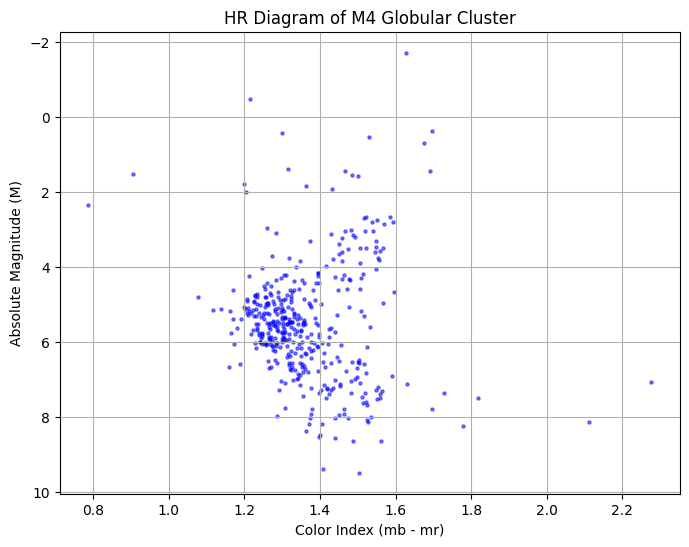

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(df['color_index'], df['M'], s=5, c='blue', alpha=0.5)
plt.xlabel('Color Index (mb - mr)')
plt.ylabel('Absolute Magnitude (M)')
plt.title('HR Diagram of M4 Globular Cluster')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()